## Cross Validation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/winequality-red.csv", delimiter=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

The dataset consists of only 6 types of quality. So we remap them to 0 to 5.

In [5]:
quality_mapping = { 3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5 }

In [8]:
df.loc[:, "quality"] = df["quality"].map(quality_mapping)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


## Prepare Data

### Shuffle Data

`Sample` function Return a random sample of items from an axis of object. `frac` stands for fraction here. So the code below will return entire dataset, shuffled.

In [11]:
# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.shape

(1599, 12)

`df_train` will have first 1000 rows and `df_test` will have last 599 rows

In [13]:
df_train = df.head(1000)
df_test = df.tail(599)

In [22]:
df_train_data = df_train.drop('quality', axis=1)
df_test_data = df_test.drop('quality', axis=1)

In [23]:
df_train_target = df_train["quality"]
df_test_target = df_test["quality"]

## Preparing Matplotlib

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [37]:
train_accuracies = []
test_accuracies = []

## Decision Tree Implimentation

In [ ]:
from sklearn import tree
from sklearn import metrics

In [38]:
def decision_tree(depth):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(df_train_data, df_train_target)
    
    # generate predictions on the training set
    train_predictions = clf.predict(df_train_data)

    # generate predictions on the test set
    test_predictions = clf.predict(df_test_data)
    
    # calculate the accuracy of predictions on # training data set
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    # calculate the accuracy of predictions on
    # test data set
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [39]:
for depth in range(1, 25):
    decision_tree(depth)

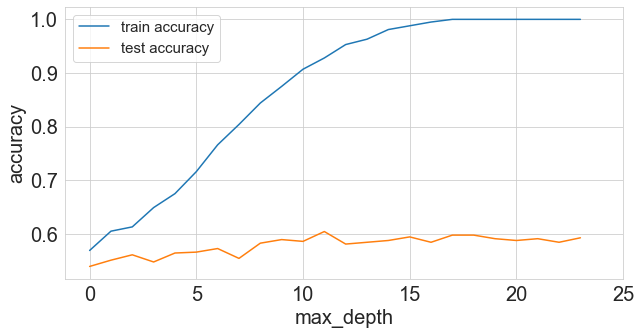

In [40]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

The model here is **overfitting**

**Occam’s razor** in simple words states that one should not try to complicate things that can be solved in a much simpler manner. In other words, the simplest solutions are the most generalizable solutions. In general, whenever your model does not obey Occam’s razor, it is probably overfitting.

## On Cross Validation

Splitting data to training and testing data is a kind of cross-validation commonly known as a **hold-out set**. Some other commonly used cross validation techniques are

- k-fold cross-validation
- stratified k-fold cross-validation
- hold-out based validation
- leave-one-out cross-validation
- group k-fold cross-validation

## K-Fold Cross Validation